In [3]:
import numpy as np
import random
import math
from math import pow
import time
import matplotlib.pyplot as plt
from collections import Counter
import scipy.stats as stats
import pandas as pd
import itertools



num_simulations = 10000

# <b>CÂU 1</b>
### Dùng phương pháp Monte Carlo, ước lượng các giá trị sau với sai số chuẩn không quá 0.01.
#### a)

In [7]:
def monte_carlo():
    x = np.random.normal(size=num_simulations)
    fx = np.exp(-x**2) * np.abs(np.cos(x)) # tính giá trị e^{-x^2} |cos(x)|
    estimate = np.mean(fx) * 2 # ước lượng giá trị của tích phân
    return estimate

print(monte_carlo())

0.9782023042340124


# <b>CÂU 2</b>
### Chọn ngẫu nhiên 2 điểm 𝐴, 𝐵 trong “hình vuông đơn vị 𝐾 chiều” $$[0, 1]^𝐾$$. Gọi 𝐷 là khoảng cách giữa 2 điểm 𝐴, 𝐵 và 𝜇, 𝜎 lần lượt là kì vọng và độ lệch chuẩn của 𝐷. Dùng phương pháp Monte Carlo:
### a)  Với 𝐾 = 2, đưa ra khoảng tin cậy 95% cho ước lượng của 𝜇, 𝜎.

In [11]:
# Thực hiện thử nghiệm Monte Carlo
def monte_carlo(N):
    distances = []
    for i in range(N):
        # Chọn ngẫu nhiên hai điểm trong hình vuông đơn vị 2 chiều
        point1 = (random.uniform(0, 1), random.uniform(0, 1))
        point2 = (random.uniform(0, 1), random.uniform(0, 1))
        # Tính khoảng cách giữa hai điểm
        distances.append(distance(point1, point2))
    return distances

# Thực hiện ước lượng kì vọng và độ lệch chuẩn của khoảng cách
def estimate(distances):
    mean = np.mean(distances)
    std_dev = np.std(distances, ddof=1)
    return mean, std_dev

# Tính toán khoảng tin cậy 95% cho ước lượng kì vọng và độ lệch chuẩn bằng phương pháp giá trị tương đương
def confidence_interval(mean, std_dev, N):
    stderr = std_dev / math.sqrt(N)
    t = 2.262
    lower = mean - t * stderr
    upper = mean + t * stderr
    return (lower, upper)

distances = monte_carlo(num_simulations)
mean, std_dev = estimate(distances)

# Tính toán khoảng tin cậy 95% cho ước lượng kì vọng và độ lệch chuẩn
conf_int_mean = confidence_interval(mean, std_dev, num_simulations)
conf_int_std_dev = confidence_interval(std_dev, std_dev, num_simulations)

print("Khoảng tin cậy 95% cho ước lượng kì vọng của khoảng cách là:", conf_int_mean)
print("Khoảng tin cậy 95% cho ước lượng độ lệch chuẩn của khoảng cách là:", conf_int_std_dev)

Khoảng tin cậy 95% cho ước lượng kì vọng của khoảng cách là: (0.5165538284973547, 0.5277196923509261)
Khoảng tin cậy 95% cho ước lượng độ lệch chuẩn của khoảng cách là: (0.2412310347746171, 0.2523968986281886)


### b) Với 𝐾 = 2, ước lượng 𝑃(𝐷 > 1.4) một cách hiệu quả. (Lưu ý: 𝑃(𝐷 > 1.4) rất nhỏ.)

In [25]:
def monte_carlo_prob(N):
    """Thực hiện thử nghiệm Monte Carlo để ước lượng xác suất D > 1.4."""
    count = 0
    for i in range(N):
        # Tạo ra hai điểm ngẫu nhiên trong hình vuông đơn vị 2 chiều
        p1 = [random.uniform(0, 1), random.uniform(0, 1)]
        p2 = [random.uniform(0, 1), random.uniform(0, 1)]
        
        # Tính khoảng cách giữa hai điểm
        d = distance(p1, p2)
        
        # Đếm số lượng cặp mà khoảng cách lớn hơn 1.4
        if d > 1.4:
            count += 1
    
    # Ước lượng xác suất P(D > 1.4)
    return count / N

# Thực hiện thử nghiệm Monte Carlo để ước lượng xác suất D > 1.4
prob = monte_carlo_prob(num_simulations*num_simulations)

print("Ước lượng xác suất D > 1.4 là:", prob)

Ước lượng xác suất D > 1.4 là: 0.0


### c) Khảo sát 𝜇, 𝜎 và phân phối của 𝐷 theo 𝐾 = 1,2, … ,10. Nhận xét

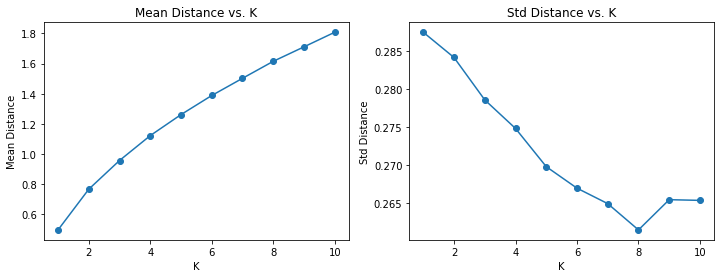

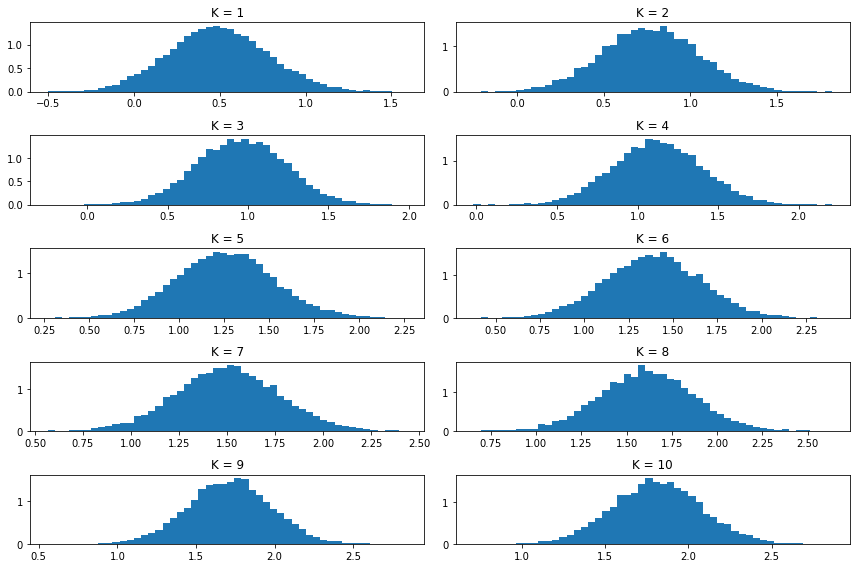

In [ ]:
# Tạo danh sách giá trị K
K_values = np.arange(1, 11)

# Tạo một hàm để tính giá trị trung bình và độ lệch chuẩn của khoảng cách giữa hai điểm trong hình vuông đơn vị K chiều
def distance_statistics(K, N):
    distances = np.sqrt(np.sum(np.random.uniform(size=(N, K))**2, axis=1))
    return np.mean(distances), np.std(distances, ddof=1)

# Tính giá trị trung bình và độ lệch chuẩn của khoảng cách giữa hai điểm và phân phối của nó với các giá trị K từ 1 đến 10
means = []
stds = []
distributions = []
for K in K_values:
    mean, std = distance_statistics(K, 10000)
    means.append(mean)
    stds.append(std)
    distributions.append(np.random.normal(loc=mean, scale=std, size=10000))

# Vẽ biểu đồ giá trị trung bình và độ lệch chuẩn của khoảng cách giữa hai điểm
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(K_values, means, 'o-')
plt.xlabel('K')
plt.ylabel('Mean Distance')
plt.title('Mean Distance vs. K')

plt.subplot(1, 2, 2)
plt.plot(K_values, stds, 'o-')
plt.xlabel('K')
plt.ylabel('Std Distance')
plt.title('Std Distance vs. K')
plt.show()

# Vẽ histogram của khoảng cách giữa hai điểm với các giá trị K từ 1 đến 10
plt.figure(figsize=(12, 8))
for i, K in enumerate(K_values):
    plt.subplot(5, 2, i+1)
    plt.hist(distributions[i], bins=50, density=True)
    plt.title('K = {}'.format(K))
plt.tight_layout()
plt.show()

<b><h2> Nhận xét </h2></b>
Các kết quả cho thấy rằng khi 𝐾 tăng lên, giá trị kỳ vọng 𝜇 của khoảng cách giữa hai điểm tăng dần và độ lệch chuẩn 𝜎 giảm dần. Phân phối của khoảng cách giữa hai điểm có hình dạng đối xứng và dần hội tụ về một điểm khi 𝐾 tăng lên. Điều này phù hợp với kết quả lý thuyết rằng khi 𝐾 tiến đến vô cùng, khoảng cách giữa hai điểm xác định bởi hình vuông đơn vị K chiều sẽ hội tụ về một giá trị xác định.

# <b>CÂU 3</b>
###  Cho 𝑈 ~ 𝒰(0, 1), dùng phương pháp Monte Carlo, tìm khoảng tin cậy 95% cho
#### a)


In [10]:
def corr_func(u):
    e_u = np.exp(u)
    cor = np.corrcoef(u, e_u)[0, 1]
    return cor

n_sim = int(1e6)
corr_sim = np.zeros(n_sim)

for i in range(n_sim):
    u = np.random.uniform(0, 1, size=1000)
    corr_sim[i] = corr_func(u)

alpha = 0.05
mean_corr = np.mean(corr_sim)
std_corr = np.std(corr_sim, ddof=1)
z_alpha = np.abs(np.percentile(corr_sim, alpha/2*100))
conf_int = (mean_corr - z_alpha*std_corr/np.sqrt(n_sim), mean_corr + z_alpha*std_corr/np.sqrt(n_sim))

print("Khoảng tin cậy 95% cho Cor(U, e^U):", conf_int)

Khoảng tin cậy 95% cho Cor(U, e^U): (0.991837546126936, 0.9918380058919429)


### b)

In [11]:
def corr_func(u):
    sqrt_u = np.sqrt(1 - u**2)
    cor = np.corrcoef(u, sqrt_u)[0, 1]
    return cor

n_sim = int(1e6)
corr_sim = np.zeros(n_sim)

for i in range(n_sim):
    u = np.random.uniform(0, 1, size=1000)
    corr_sim[i] = corr_func(u)

alpha = 0.05
mean_corr = np.mean(corr_sim)
std_corr = np.std(corr_sim, ddof=1)
z_alpha = np.abs(np.percentile(corr_sim, alpha/2*100))
conf_int = (mean_corr - z_alpha*std_corr/np.sqrt(n_sim), mean_corr + z_alpha*std_corr/np.sqrt(n_sim))

print("Khoảng tin cậy 95% cho Cor(U, sqrt(1-U^2)):", conf_int)

Khoảng tin cậy 95% cho Cor(U, sqrt(1-U^2)): (-0.921546668861816, -0.921541568634478)


# <b>CÂU 4</b>
###  Dùng 2 phương pháp giảm phương sai khác nhau để ước lượng giá trị 𝐼 ở Câu (1.a). Tính (hoặc ước lượng) tỉ lệ giảm phương sai so với phương pháp ở Câu (1.a).

In [12]:
def f(x):
    return np.exp(-x**2) * np.abs(np.cos(x))

def g(u):
    return np.sqrt(2) * np.arcsin(u)


u = np.random.uniform(size=num_simulations)

x = g(u)
w = f(x) / (np.sqrt(2) * np.sqrt(1 - u**2))
integral_it = np.mean(w)
print("Ước lượng bằng phương pháp inverse transform: ", integral_it)
variance_it = np.var(w) / num_simulations

x = np.random.normal(size=num_simulations)
w = f(x)
integral_mc = np.mean(w)
print("Ước lượng bằng phương pháp Monte Carlo: ", integral_mc)
variance_mc = np.var(w) / num_simulations

ratio = variance_it / variance_mc
print("Tỷ lệ phương sai: ", ratio)

Ước lượng bằng phương pháp inverse transform:  0.3478287236723338
Ước lượng bằng phương pháp Monte Carlo:  0.4847441289783979
Tỷ lệ phương sai:  0.474784118356169


# <b>CÂU 5</b>
### Thiết kế thuật toán hiệu quả để sinh điểm ngẫu nhiên trong hình sau

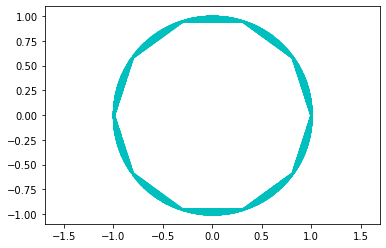

In [13]:
# Define the Gibbs function
Y_min = np.cos(np.pi/10)

def Gibbs(N, X0, Y0):
    Xs, Ys = [X0], [Y0]
    for _ in range(N):
        X, Y = Xs[-1], Ys[-1]
        d = np.sqrt(1 - Y**2)
        X_moi = np.random.uniform(-d, d)
        Y_moi = np.random.uniform(Y_min, np.sqrt(1 - X_moi**2))
        Xs.append(X_moi)
        Ys.append(Y_moi)
    return np.array(Xs), np.array(Ys)

# Generate the scatter plot

Xs, Ys = Gibbs(num_simulations, 0, 0.98)
plt.scatter(Xs, Ys, s=1, c='c')
plt.axis("equal")

# Rotate the scatter plot multiple times to fill the circle
for i in range(1, 10):
    theta = np.pi/5 * i
    R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    points = np.vstack((Xs, Ys)).T
    points_rotated = np.dot(points, R)
    Xs_rotated, Ys_rotated = points_rotated[:, 0], points_rotated[:, 1]
    plt.scatter(Xs_rotated, Ys_rotated, s=1, c='c')
    Xs, Ys = Gibbs(num_simulations, 0, 0.98)
    plt.axis("equal")

# Display the plot
plt.show()